In [19]:
import numpy as np
import tensorflow as tf

In [20]:
(train_data, train_label), (test_data, test_label) =\
    tf.keras.datasets.boston_housing.load_data()

In [21]:
train_data.shape

(404, 13)

In [22]:
train_label.shape

(404,)

In [23]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None, 13], dtype=tf.float32)
    labels = tf.placeholder(shape=[None], dtype=tf.float32)
    
    h1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
    h2 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(h1)
    output = tf.keras.layers.Dense(1, activation=None)(h2)
    
    loss = tf.reduce_mean(
        tf.keras.losses.mean_squared_error(labels, output))
    
    optim = tf.train.GradientDescentOptimizer(learning_rate=1e-6)
    train_op = optim.minimize(loss)

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    batch_size= 32
    for epoch in range(200):
        order = np.argsort(np.random.random(train_label.shape))
        train_data = train_data[order]
        train_label = train_label[order]
        
        res_train_losses = []
        for i in range(train_label.shape[0] // batch_size):
            start = i * batch_size
            end = (i + 1) * batch_size
            res_train_loss, _ = sess.run([loss, train_op],
                     feed_dict={inputs: train_data[start: end],
                                labels: train_label[start: end]})
            res_train_losses.append(res_train_loss)
        res_val_loss = sess.run(loss,
                 feed_dict={inputs: test_data,
                            labels: test_label})
        print('epoch %3d, train loss %2.4f, val loss %2.4f' %
              (epoch, res_train_loss, np.mean(res_train_losses)))

epoch   0, train loss 130.3410, val loss 766.0109
epoch   1, train loss 148.7038, val loss 99.0436
epoch   2, train loss 96.9762, val loss 103.2786
epoch   3, train loss 103.7976, val loss 99.3358
epoch   4, train loss 111.8239, val loss 95.7553
epoch   5, train loss 114.7866, val loss 97.2887
epoch   6, train loss 76.4997, val loss 95.5522
epoch   7, train loss 152.3408, val loss 98.2338
epoch   8, train loss 86.2236, val loss 94.5412
epoch   9, train loss 90.5598, val loss 97.6153
epoch  10, train loss 73.4483, val loss 93.5682
epoch  11, train loss 72.2662, val loss 94.4074
epoch  12, train loss 25.2067, val loss 93.3320
epoch  13, train loss 82.9645, val loss 91.7699
epoch  14, train loss 100.7839, val loss 93.2040
epoch  15, train loss 105.0298, val loss 92.3122
epoch  16, train loss 136.0706, val loss 91.4519
epoch  17, train loss 96.1736, val loss 89.8437
epoch  18, train loss 63.1567, val loss 90.3711
epoch  19, train loss 103.6810, val loss 94.7700
epoch  20, train loss 100.92

## 作业

1. 复现上述房价预测代码
2. 为上述模型训练添加代价变化的`TensorBoard`摘要
3. 导入`Fashion_MNIST`数据集并可视化
4. 构建全连接神经网络并使用导入的数据训练分类器
5. 尝试改进神经网络的结构与训练方法提高模型性能


提示：可使用`tf.keras.datasets.fashion_mnist.load_data()`导入数据

1. 复现上述房价预测代码
2. 为上述模型训练添加代价变化的TensorBoard摘要

In [24]:
import numpy as np
import tensorflow as tf

In [26]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.boston_housing.load_data()

with tf.Graph().as_default() as g:
    
    inputs = tf.placeholder(shape=[None, 13], dtype=tf.float32)
    labels = tf.placeholder(shape=[None,], dtype=tf.float32)
    
    h1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
    h2 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(h1)
    output = tf.keras.layers.Dense(1, activation=None)(h2)
    
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(labels, output))
        val_loss_summary = tf.summary.scalar('val_loss', loss)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-6).minimize(loss)
    

with tf.Session(graph = g) as sess:

    writer = tf.summary.FileWriter('./graphs')
    writer.add_graph(g)
    
    sess.run(tf.global_variables_initializer())
    
    batch_size = 32
    for epoch in range(200):
        order = np.argsort(np.random.random(train_label.shape))
        train_data = train_data[order]
        train_label = train_label[order]
        
        train_num = train_label.shape[0] // batch_size
        for i in range(train_num):
            start = i * batch_size
            end = (i+1) * batch_size
            sess.run([loss, optimizer], feed_dict={
                inputs: train_data[start: end],
                labels: train_label[start: end]})
            
        res = sess.run(val_loss_summary, feed_dict={
            inputs: test_data,
            labels: test_label
        })
        writer.add_summary(res, epoch)
        
    writer.close()

使用tensorboard可视化模型训练时在验证集上的损失

<img src="val_loss.png">

方法二:

D:\Anaconda3\envs\pydp\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(13,), units=64)`
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\envs\pydp\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16)`
  if sys.path[0] == '':
D:\Anaconda3\envs\pydp\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


Train on 404 samples, validate on 102 samples
Epoch 1/300
 - 0s - loss: 1120.4460 - val_loss: 102.0779
Epoch 2/300
 - 0s - loss: 114.0900 - val_loss: 96.7795
Epoch 3/300
 - 0s - loss: 62.5859 - val_loss: 61.0377
Epoch 4/300
 - 0s - loss: 56.0189 - val_loss: 61.5416
Epoch 5/300
 - 0s - loss: 56.0377 - val_loss: 60.9013
Epoch 6/300
 - 0s - loss: 55.6384 - val_loss: 61.2203
Epoch 7/300
 - 0s - loss: 54.5937 - val_loss: 62.3440
Epoch 8/300
 - 0s - loss: 53.1588 - val_loss: 62.6461
Epoch 9/300
 - 0s - loss: 51.7627 - val_loss: 61.8082
Epoch 10/300
 - 0s - loss: 50.3707 - val_loss: 59.9144
Epoch 11/300
 - 0s - loss: 48.9575 - val_loss: 57.7119
Epoch 12/300
 - 0s - loss: 47.6349 - val_loss: 55.6380
Epoch 13/300
 - 0s - loss: 46.4078 - val_loss: 54.0297
Epoch 14/300
 - 0s - loss: 45.3495 - val_loss: 52.3146
Epoch 15/300
 - 0s - loss: 44.3025 - val_loss: 51.0096
Epoch 16/300
 - 0s - loss: 43.3728 - val_loss: 50.0058
Epoch 17/300
 - 0s - loss: 42.5167 - val_loss: 48.7959
Epoch 18/300
 - 0s - los

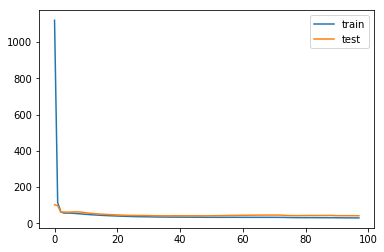

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.datasets import boston_housing
import tensorflow as tf
import keras
from matplotlib import pyplot as plt

def nnRegression():
    nn = Sequential()
    nn.add(Dense(output_dim=64,input_shape=(13,)))
    nn.add(Activation('relu'))
    nn.add(Dense(output_dim=16))
    nn.add(Activation('relu'))
    nn.add(Dense(output_dim=1))
    
    nn.compile(loss='mse', optimizer='adam')

    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)
    # 训练
    history = nn.fit(x_train, y_train, epochs=300, batch_size=20, validation_data=(x_test, y_test), verbose=2, shuffle=False, callbacks=[early_stopping])
    # loss曲线
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    
nnRegression()    

3. 导入Fashion_MNIST数据集并可视化
4. 构建全连接神经网络并使用导入的数据训练分类器
5. 尝试改进神经网络的结构与训练方法提高模型性能

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# train_images = train_images.reshape([60000, 28*28])
# test_images = test_images.reshape([10000, 28*28])
# train_images.shape

In [5]:
train_labels[0]

9

In [6]:
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [7]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

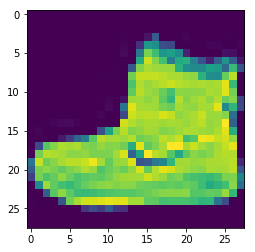

In [8]:
plt.imshow(Image.fromarray(train_images[0].reshape(28, 28)))

Epoch 1/100
 - 1s - loss: 12.2691 - acc: 0.2339
Epoch 2/100
 - 1s - loss: 9.8254 - acc: 0.3866
Epoch 3/100
 - 1s - loss: 8.0778 - acc: 0.4948
Epoch 4/100
 - 1s - loss: 7.2674 - acc: 0.5460
Epoch 5/100
 - 1s - loss: 6.8920 - acc: 0.5699
Epoch 6/100
 - 1s - loss: 6.6043 - acc: 0.5884
Epoch 7/100
 - 1s - loss: 6.4910 - acc: 0.5956
Epoch 8/100
 - 1s - loss: 6.4689 - acc: 0.5972
Epoch 9/100
 - 1s - loss: 6.3743 - acc: 0.6032
Epoch 10/100
 - 1s - loss: 6.3558 - acc: 0.6045
Epoch 11/100
 - 1s - loss: 6.3100 - acc: 0.6076
Epoch 12/100
 - 1s - loss: 6.2502 - acc: 0.6111
Epoch 13/100
 - 1s - loss: 6.2373 - acc: 0.6121
Epoch 14/100
 - 1s - loss: 6.2493 - acc: 0.6114
Epoch 15/100
 - 1s - loss: 6.2448 - acc: 0.6116
Epoch 16/100
 - 1s - loss: 6.2251 - acc: 0.6128
Epoch 17/100
 - 1s - loss: 6.1442 - acc: 0.6179
Epoch 18/100
 - 1s - loss: 6.1479 - acc: 0.6179
Epoch 19/100
 - 1s - loss: 6.1346 - acc: 0.6187
Epoch 20/100
 - 1s - loss: 6.1689 - acc: 0.6164
Epoch 21/100
 - 1s - loss: 6.1782 - acc: 0.6160


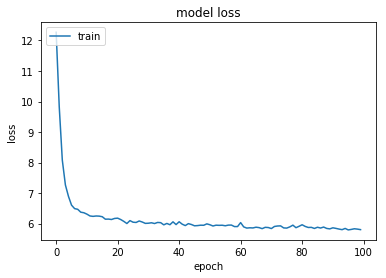

Test loss: 5.739430226898193
Test top 1 accuracy: 0.6437


In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu',kernel_initializer = 'glorot_uniform'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax',kernel_initializer = 'glorot_uniform'))


model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])
history = model.fit(train_images, train_labels,batch_size=256,epochs=100,verbose=2)

# print(model.summary())
plt.plot(history.history['loss'])

plt.title("model loss")

plt.ylabel("loss")

plt.xlabel("epoch")

plt.legend(["train"],loc="upper left")

plt.show()

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test top 1 accuracy:', score[1])